In [39]:
import os
import json
import pickle

import matplotlib.pyplot as plt
import pandas as pd
import requests
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [41]:
url: str = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
data_dir: str = "./data"
results_dir: str = "./results"
filename: str = f"{data_dir}/wbdc.csv"

In [3]:
os.makedirs(data_dir, exist_ok=True)

if not os.path.exists(filename):
    with requests.session() as session, open(filename, "w") as file:
        response = session.get(url)
        response.raise_for_status()
        print(response.status_code)
        print(response.headers)
        print(response.encoding)
        if response.status_code == 200:
            file.write(response.text)

In [4]:
columns = [
    'id',
    'diagnosis',
    # 1
    'radius1',
    'texture1',
    'perimeter1',
    'area1',
    'smoothness1',
    'compactness1',
    'concavity1',
    'concave_points1',
    'symmetry1',
    'fractal_dimension1',
    # 2
    'radius2',
    'texture2',
    'perimeter2',
    'area2',
    'smoothness2',
    'compactness2',
    'concavity2',
    'concave_points2',
    'symmetry2',
    'fractal_dimension2',
    # 3
    'radius3',
    'texture3',
    'perimeter3',
    'area3',
    'smoothness3',
    'compactness3',
    'concavity3',
    'concave_points3',
    'symmetry3',
    'fractal_dimension3',
]

In [5]:
df: pd.Dataframe = pd.read_csv(
    filename,
    header=None,
)
df.columns = columns

In [21]:
df

,id,diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  569 non-null    int64  
 1   diagnosis           569 non-null    object 
 2   radius1             569 non-null    float64
 3   texture1            569 non-null    float64
 4   perimeter1          569 non-null    float64
 5   area1               569 non-null    float64
 6   smoothness1         569 non-null    float64
 7   compactness1        569 non-null    float64
 8   concavity1          569 non-null    float64
 9   concave_points1     569 non-null    float64
 10  symmetry1           569 non-null    float64
 11  fractal_dimension1  569 non-null    float64
 12  radius2             569 non-null    float64
 13  texture2            569 non-null    float64
 14  perimeter2          569 non-null    float64
 15  area2               569 non-null    float64
 16  smoothne

In [6]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [8]:
print(df.isnull().sum().sum())
print(df.duplicated().sum())

0
0


# EDA
- nan
- Encode features
- Normilize
- Find features
- Split into train, val?, test
- Train model LogReg
- Predict
- Calculate metrics: (Accuracy, Precision, Recall, F1)
- Save model: (в формате JSON или CSV)

In [33]:

X = df.drop(columns=['diagnosis'])


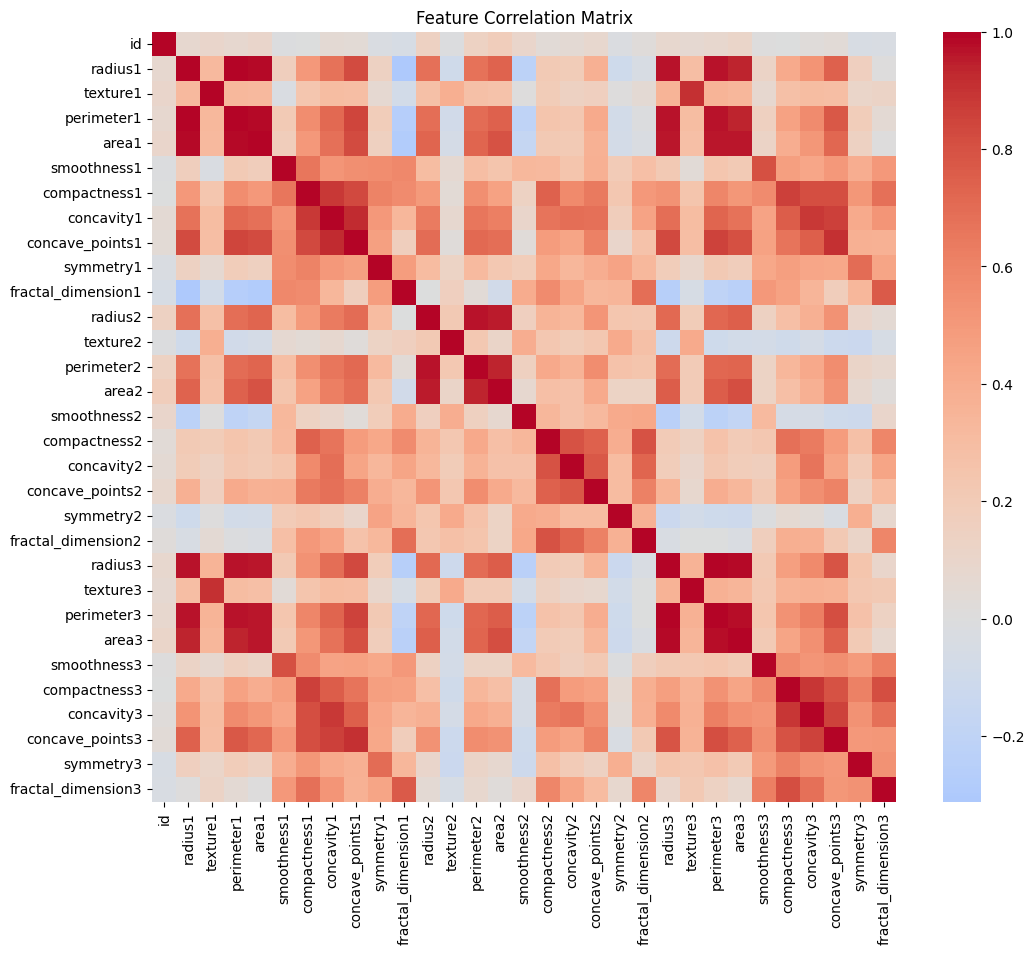

In [15]:
plt.figure(figsize=(12, 10))
sns.heatmap(X.corr(), cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

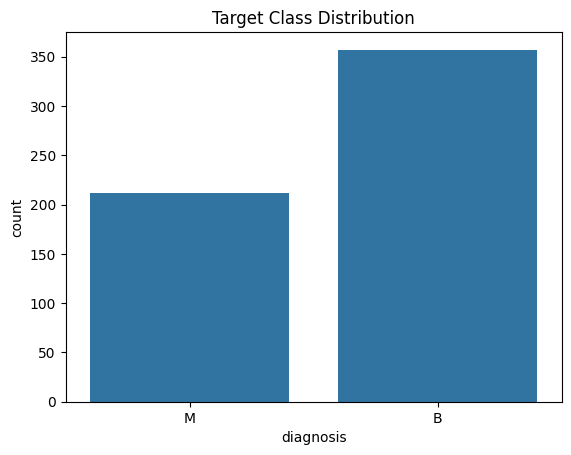

In [16]:
sns.countplot(x=y)
plt.title("Target Class Distribution")
plt.show()

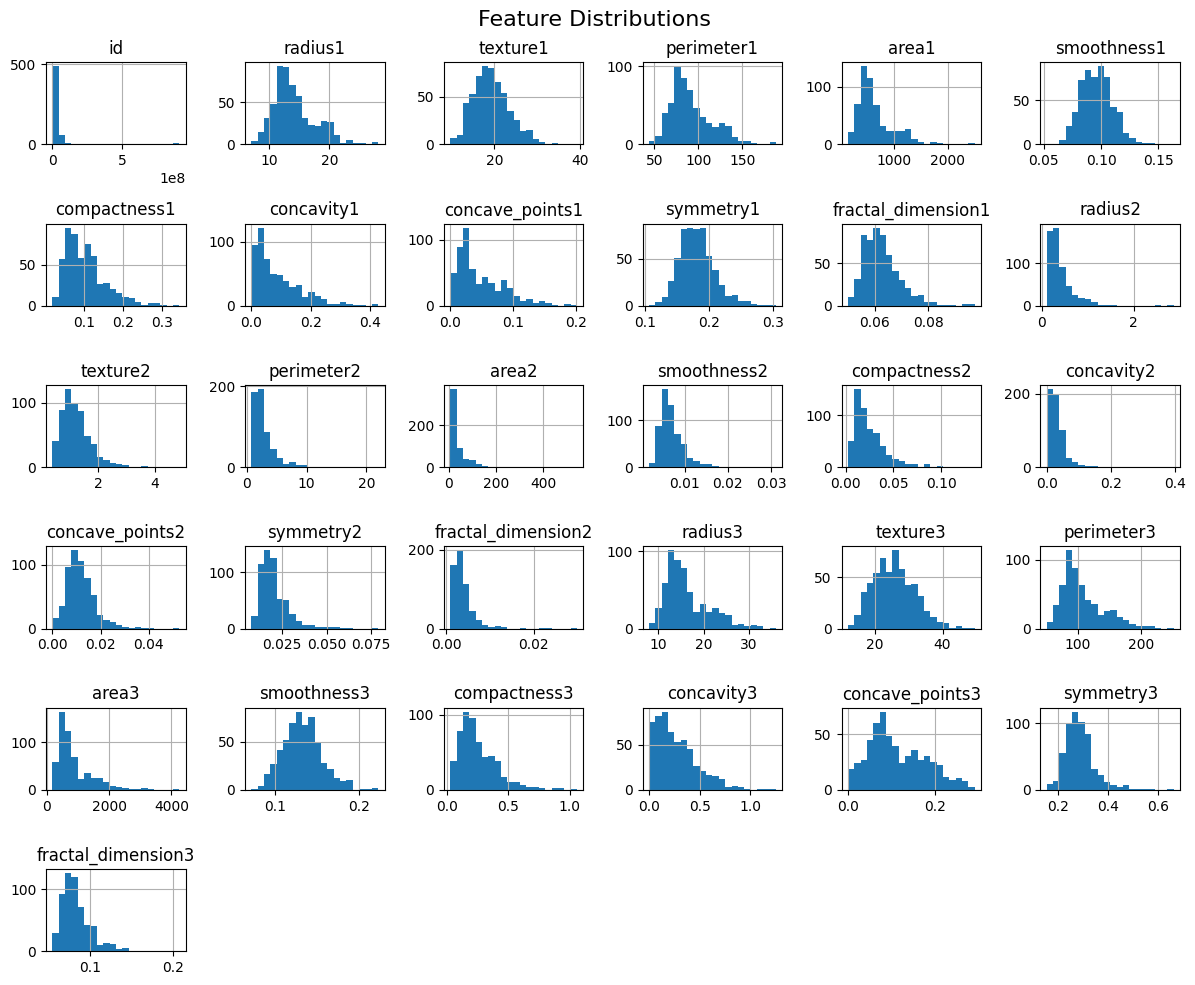

In [19]:
X.hist(bins=20, figsize=(12, 10))
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

# Scale, encode

In [34]:
df['diagnosis_encoded'] = df['diagnosis'].map({'M': 0, 'B': 1})
y = df['diagnosis_encoded']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Train

In [35]:
# Train model
model = LogisticRegression(max_iter=10000, random_state=42)
model.fit(X_train_scaled, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,10000
,multi_class,'deprecated'


In [37]:
# Predict
y_pred = model.predict(X_test_scaled)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")
f1 = f1_score(y_test, y_pred)
print(f"F1: {f1:.2f}")

Accuracy: 0.98
Precision: 0.99
Recall: 0.99
F1: 0.99


In [46]:
results_file: str = f"{results_dir}/results.json"

results = {
    "accuracy": accuracy,
    "precision": precision,
    "recall": recall,
    "f1": f1,
}

os.makedirs(results_dir, exist_ok=True)
with open(results_file, "w") as f:
    json.dump(results, f)